# PARTE 1 - REGRESSÃO LINEAR SIMPLES

Carregue o conjunto de dados de gorjetas. Faça o que se pede:
1. Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).
2. Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado
3. Mostre na tela os valores dos pesos (parâmetros).
4. Para um valor de entrada de 30, qual a predição do modelo?
5. Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo. E.g.:

In [1516]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1517]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Questão 1
Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).

In [1518]:
x = df[['total_bill']]
y = df['tip']

In [1519]:
x.shape

(244, 1)

In [1520]:
y.shape

(244,)

In [1521]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [1522]:
# Construindo a predição do modelo
y_pred_model = model.predict(x)
print(y_pred_model[:20])

[2.70463616 2.00622312 3.12683472 3.40725019 3.5028225  3.57633966
 1.84133463 3.74332864 2.49983836 2.47253198 1.99887141 4.6234341
 2.53974767 2.85587147 2.47778321 3.1866987  2.00517288 2.631119
 2.70253567 3.0890259 ]


### Questão 2
Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado

In [1523]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y, y_pred_model))

Erro médio quadrático: 1.04


Complemento

In [1524]:
# para visualizar o Coeficiente de Determinação
model.score(x,y)

0.45661658635167657

### Questão 3
Mostre na tela os valores dos pesos (parâmetros).

In [1525]:
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):    {w1.round(5)}')

Coeficiente de interceptação(Peso w0): 0.9203
Coeficiente de inclinação(Peso w1):    [0.10502]


### Questão 4
Para um valor de entrada de 30, qual a predição do modelo?

In [1526]:
#Predição do modelo com o valor de entrada 30
model.predict([[30]])

array([4.07100514])

### Questão 5
Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo.

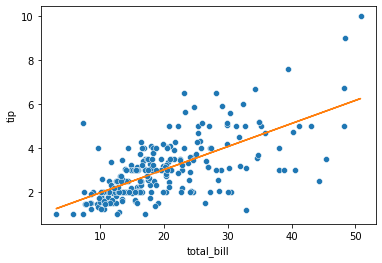

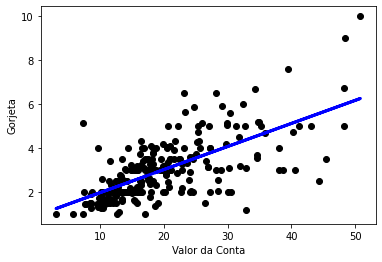

In [1527]:
# Plotar com scatterplot
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred_model, color='blue', linewidth=3)
plt.xlabel('Valor da Conta')
plt.ylabel('Gorjeta')
plt.show()

# === Desafio === 
1. Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.
2. Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem. E.g.:
3. Mostre as mesmas informações pedidas nas questões anteriores sobre a regressão linear criada com scikit-learn: MSE, pesos, predição para o valor 30 e o plot da reta aprendida. Compare com os resultados do modelo treinado com o scikit-learn.


# Gradiente descedente Estocástico

### Questão 1
Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.

In [1528]:
X = df['total_bill']
y = df['tip']
#Definindo a função custo
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y)) #Definição do cálculo da função de custo
    return cost

In [1529]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations): #qtd de vezes que passa pelos dados
        cost =0.0
        for i in range(m): #Vai de dado em dado
            rand_ind = np.random.randint(0,m) #definindo dado aleatório randomicamente
            X_i = X[rand_ind,:].reshape(1,X.shape[1]) #entrada randômica
            y_i = y[rand_ind].reshape(1,1) #saída randômica
            prediction = np.dot(X_i,theta) #multiplicação 

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i))) #atualizando os coeficientes(pesos)
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

### Questão 2
Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem.

In [1530]:
lr =0.0001 #Definindo a taxa de aprendizagem
n_iter1 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X] #Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history1 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter1)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))

Theta0:          0.096
Theta1:          0.135
Final cost/MSE:  107.576


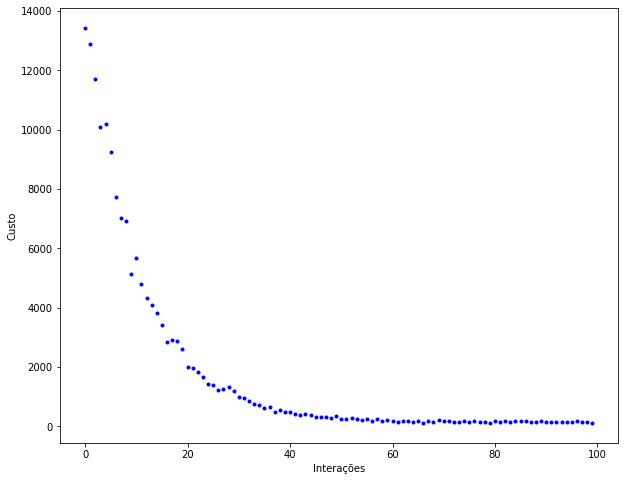

In [1531]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')

ax.plot(range(n_iter1),cost_history1,'b.');

In [1532]:
lr =0.001 #Definindo a taxa de aprendizagem
n_iter2 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X]#Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history2 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter2)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))

Theta0:          -1.173
Theta1:          0.191
Final cost/MSE:  214.371


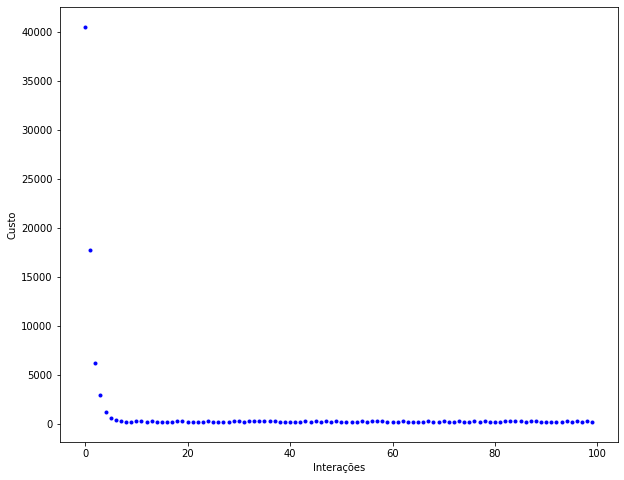

In [1533]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')


ax.plot(range(n_iter2),cost_history2,'b.');

In [1534]:
lr =0.0003 #Definindo taxa de aprendizagem
n_iter3 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X]#Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history3 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter3)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))

Theta0:          -0.042
Theta1:          0.147
Final cost/MSE:  164.818


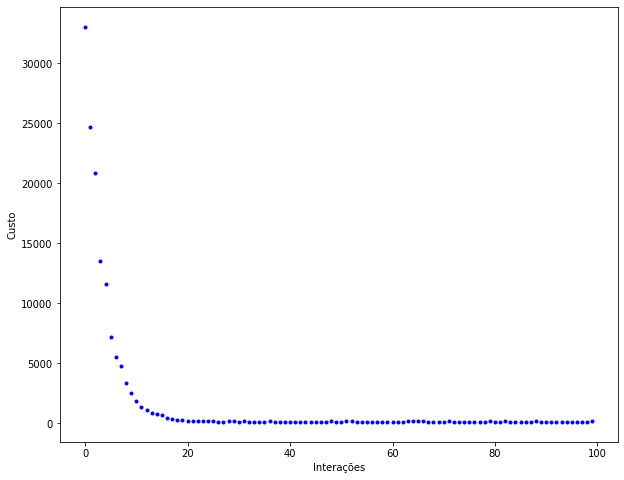

In [1535]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')

ax.plot(range(n_iter3),cost_history3,'b.');

# PARTE 2 - Regressão Linear Múltipla
Considere o conjunto de dados disponibilizado neste link. Os dados referem-se às casas encontradas em um determinado distrito da Califórnia e a algumas estatísticas resumidas sobre elas com base nos dados do censo de 1990. Considere que haja um problema de regressão no qual desejamos criar um modelo que faça a predição do valor mediano das casas de um distrito ('median_house_value') com base em outras informações. Crie pelo menos 3 modelos que façam essa predição utilizando mais de uma variável de entrada e compare a diferença de MSE. Qual o melhor modelo encontrado? Justifique a escolha das variáveis.

In [1536]:
df_house = pd.read_csv('california_housing_train.csv')
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [1537]:
df_house.describe();

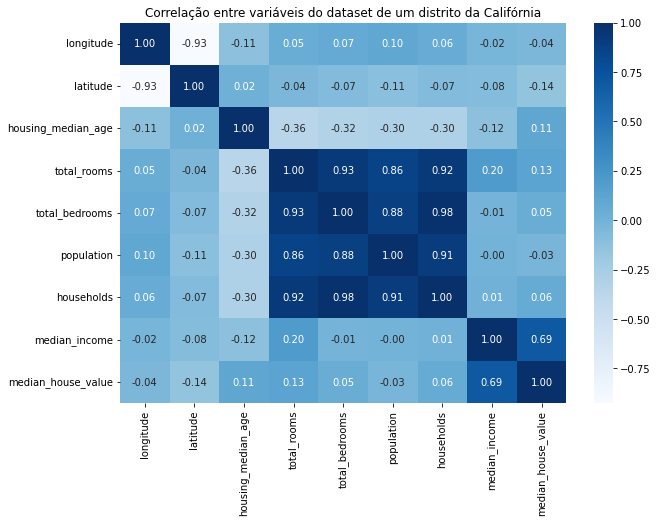

In [1538]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(df_house.corr(),
            annot = True,
            fmt = '.2f',#deixando em duas casas decimais
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de um distrito da Califórnia')
plt.show()

### Modelo 1
No primeiro modelo escolhido, as features de entrada serão: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.

In [1539]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value']

In [1540]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [1541]:
#Erro médio quadrático

print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
print('Raiz do erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y,squared=False))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 6535814191.46
Raiz do erro médio quadrático: 80844.38
Coeficiente de interceptação(Peso w0): -11131.3643
Coeficiente de inclinação(Peso w1):  [43389.52463  1746.30287]
Coeficiente de determinação: 0.5141179623105907


### Modelo 2
Aqui utilizarei todas as features possíveis como entrada para ver o comportamento do modelo com todas elas como entrada.
Obviamente, tendo como saída a predição valor mediano das casas de um distrito ('median_house_value').


In [1542]:
X = df_house.drop(['median_house_value'], axis = 1) 
y = df_house.median_house_value #Definindo somente a 'median_house_value' como saída
X;

In [1543]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [1544]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
print('Raiz do erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y,squared=False))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 4824523173.93
Raiz do erro médio quadrático: 69458.79
Coeficiente de interceptação(Peso w0): -3620600.8930
Coeficiente de inclinação(Peso w1):  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825000e+00
  1.17648540e+02 -3.84887700e+01  4.54360000e+01  4.05070684e+04]
Coeficiente de determinação: 0.6413378529502689


### Modelo 3
Aplicando o Recursive Feature Elimination - RFE para definição das features escolhidas:
- O RFE constrói modelos à partir da remoções de features
- Utiliza a acurácia do modelo para identificar atributos ou a combinação destes que melhor contribui para se ter uma melhor perfomance 
- Em grandes bases de dados o tempo de processamento pode ser um problema 

In [1545]:
from sklearn.feature_selection import RFE
X = df_house.drop(['median_house_value'], axis = 1)
y = df_house.median_house_value
X;
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4) #Definindo a quantidade de atributos(features) que devem ser selecionadas pelo RFE e também a instanciação, no caso o model(regressão linear)

In [1546]:
fit = rfe.fit(X,y) #Entregando os dados para o rfe, que vai fazer a criação do modelo e fazer os testes levando em consideração, a acurácia. Definindo isso tudo na variável fit

In [1547]:
print("Número de features escolhidas: {}".format(fit.n_features_))

Número de features escolhidas: 4


In [1548]:
colunas = fit.get_support(indices=True) 
df_house.iloc[:,colunas] #imprimindo o df_house trazendo as features que o método RFE considera como as melhores

,longitude,latitude,housing_median_age,median_income
0,-114.31,34.19,15.0,1.4936
1,-114.47,34.40,19.0,1.8200
2,-114.56,33.69,17.0,1.6509
3,-114.57,33.64,14.0,3.1917
4,-114.57,33.57,20.0,1.9250
...,...,...,...,...
16995,-124.26,40.58,52.0,2.3571
16996,-124.27,40.69,36.0,2.5179
16997,-124.30,41.84,17.0,3.0313
16998,-124.30,41.80,19.0,1.9797


In [1549]:
# Redefinindo as entradas à partir da filtragem com o RFE
X = df_house.iloc[:,colunas]
y = df_house['median_house_value']

In [1550]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [1551]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 5406096300.11
Coeficiente de interceptação(Peso w0): -3791572.4718
Coeficiente de inclinação(Peso w1):  [-45241.04705 -44497.77956    953.27001  38044.41152]
Coeficiente de determinação: 0.5981028515659096


##### Tendo como base, o erro quadrático médio e o coeficiente de determinação como complemento, o modelo que apresentou o melhor resultado, foi o Modelo 2, em que utilizei como entrada, todas as features disponíveis (comentar sobre isso). A sequência, ficou:
##### 1. Modelo 2 
##### 2. Modelo 3
##### 3. Modelo 1

# PARTE 3 - Regressão Polinomial
Considerando o mesmo problema tratado na Parte 2, treine modelos de regressão utilizando transformações não-lineares dos atributos (x², x³, etc...). Pode-se utilizar transformações em um ou mais atributos. Treine pelo menos 3 modelos diferentes e faça o plot das curvas de regressão comparada com o scatterplot (análogo ao que foi feito na questão 5 da Parte 1). Calcule o MSE para cada um dos modelos. Qual modelo se ajustou melhor aos dados em termos de MSE?


### Modelo 1
Utilizarei como entradas, as features: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.


In [1552]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value']

X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))

Erro médio quadrático: 6272560971.92
Coeficiente de interceptação(Peso w0): -5354.829441326321
Coeficiente de inclinação(Peso w1):  [ 1.82512279e+04  5.44772642e+03  6.05165255e+03 -1.72856200e+02
 -3.70943180e+02  2.23936000e+00]
Coeficiente de determinação: 0.5336885937561535


### Modelo 2
Utilizarei como entradas, as features que com a aplicação do método RFE, foram consideradas melhores, sendo elas: 'longitude','latitude','housing_median_age','median_income'

In [1553]:
# Redefinindo as entradas à partir da filtragem com o RFE
X = df_house.iloc[:,colunas]
y = df_house['median_house_value']
X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))

Erro médio quadrático: 5113703578.26
Coeficiente de interceptação(Peso w0): 873600528.1546502
Coeficiente de inclinação(Peso w1):  [ 2.28375953e+07  2.23089642e+06  4.83220740e+03  4.68405219e+03
  1.92994576e+05 -6.46935756e+04 -1.96505030e+02  6.97399820e+03
  5.42288240e+02  6.09926490e+02  2.64548000e+00 -3.87345460e+02]
Coeficiente de determinação: 0.6198397564620397


### Modelo 3
No primeiro modelo escolhido, a feature de entrada será: 'media_income'

In [1554]:
X = df_house['median_income'].values.reshape(-1,1)
y = df_house['median_house_value'].values.reshape(-1,1)

X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))



Erro médio quadrático: 6844400238.89
Coeficiente de interceptação(Peso w0): [75138.94311659]
Coeficiente de inclinação(Peso w1):  [[15095.08877  6050.3056   -353.91044]]
Coeficiente de determinação: 0.49117722177908874


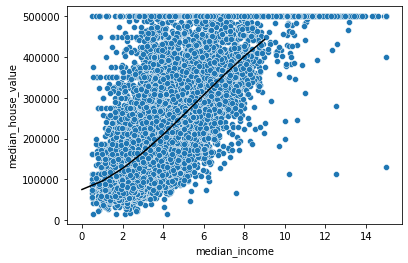

In [1555]:
sns.scatterplot(x='median_income', y='median_house_value', data=df_house)
x = np.arange(0,10).reshape(-1,1)
x = np.hstack((x,x**2,x**3))
y_pred_model = model.predict(x).flatten()
plt.plot(np.arange(0,10), y_pred_model, color='black');

##### Tendo como base, o erro quadrático médio e o coeficiente de determinação como complemento, o modelo que apresentou o melhor resultado, foi o Modelo 2, em que utilizei como entrada,as features que com a aplicação do método RFE, foram consideradas melhores, sendo elas: 'longitude','latitude','housing_median_age','median_income'. A sequência, ficou:
##### 1. Modelo 2 
##### 2. Modelo 1
##### 3. Modelo 3

# Parte 4 - Generalização, regularização e normalização
Considere o conjunto de dados utilizado nas partes 2 e 3 de preços de casas na Califórnia. Data de entrega: 04/12

Utilizando um método da validação cruzada (conjuntos de treino, validação e teste) experimente diferentes métodos de: 
- engenharia de atributos (seleção de atributos, atributos polinomiais, normalização)  
- escolha de hiperparâmetros (passo de aprendizagem, coeficiente de regularização, número de iterações) 

Treine no conjunto de treino e avalie no conjunto de validação. Avalie pelo menos 5 abordagens candidatas. 

Ao final, avalie como o seu melhor modelo performa no conjunto de teste e apresente o resultado.

Dica¹: utilize as classes SGDRegressor ou Ridge do scikitlearn.

Dica²: normalize os dados de entrada e saída

Dica³: tente utilizar grid search e/ou k-fold

In [1556]:
df_house = pd.read_csv('california_housing_train.csv')
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


### Modelo 1 -- Ajustando Hiperparâmetros
Utilizarei como entradas, as features: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.

As características de cada modelo serão apresentadas no decorrer de sua construção.

In [1557]:
#Importando do sciki-learn os métodos voltados para regressão
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [1558]:
scale_factor = 10000
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value'].to_numpy().reshape(-1,1)
y /= scale_factor

In [1559]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 2)
Teste: (3400, 2)
Somente Treino (10880, 2)
Somente Validação: (2720, 2)


Normalizando os dados de treino e validação

- Dimensionador Mín-Máx

In [1560]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [1561]:
#Definindo alguns hiperparâmetros para o modelo
#eta0: A taxa de aprendizagem inicial para os planejamentos "constante", "escalonamento" ou "adaptativo". O valor padrão é 0,01.
#alpha: Constante que multiplica o prazo de regularização. Quanto maior o valor, mais forte é a regularização. Também usado para calcular a taxa de aprendizagem quando definido como learning_rate é definido como ‘ideal’.
model = SGDRegressor(alpha=0.0001, eta0=0.1, max_iter=300)
model.fit(x_train_norm,y_train_norm.ravel())
y_pred = model.predict(x_val_norm).reshape(-1,1)

In [1562]:
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred)
#Erro médio quadrático
modelo1 = mean_squared_error(y_val,y_pred_real)
print('Erro médio quadrático: ' ,mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(x_train_norm, y_train_norm))


Erro médio quadrático:  65.28187564356779
Coeficiente de interceptação(Peso w0): [0.00384334]
Coeficiente de inclinação(Peso w1):  [1.28321 0.1807 ]
Coeficiente de determinação: 0.5081212618459796


### Modelo 2 --- GridSearchCV 
Aqui utilizarei todas as features possíveis como entrada para ver o comportamento do modelo com todas elas como entrada. Obviamente, tendo como saída a predição valor mediano das casas de um distrito ('median_house_value').

As características de cada modelo serão apresentadas no decorrer de sua construção.

In [1563]:
df_house = pd.read_csv('california_housing_train.csv')

In [1564]:
scale_factor = 10000.0
X = df_house.drop(['median_house_value'], axis = 1) 
y = df_house.median_house_value.to_numpy().reshape(-1,1) #Definindo somente a 'median_house_value' como saída
y/=scale_factor

In [1565]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 8)
Teste: (3400, 8)
Somente Treino (10880, 8)
Somente Validação: (2720, 8)


In [1566]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [1567]:
model2 = SGDRegressor()
#Olhando os parâmetros do SGDRegressor 
model2.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1568]:
# Definindo os parâmetros que serão utilizados no GridSearchCV
model2_params = {
    #Utilizando essa potenciação pra deixar o alpha sempre naquela vibe de taxa mesmo, só que dando esse intervalo para o gread trabalhar
    #O restante dos parâmetros foram definidos de acordo com a documentação
    'alpha': [0.0001,0.001,0.00001,0.03],
    'loss': ['squared_loss', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [300, 600, 1000],
    'tol':[0.01,0.001,0.0001]
}

In [1569]:
from sklearn.model_selection import GridSearchCV
# Definir uma lista de métricas, sendo a mais importante a do erro quadrático == neg_mean_squared_log_error
# Link das métricas: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
metricas = ['explained_variance','neg_mean_absolute_error','neg_mean_squared_error', 'neg_median_absolute_error', 'r2']
#  verbose=100 pra ele ir falando o que ele tá fazendo passo a passo
# No refit significa que ele vai escolher o modelo com o menor erro quadrado médio. Por último estou pedindo para não retornar os scores de treinamento.
meu_primeiro_grid = GridSearchCV(model2, param_grid=model2_params, scoring=metricas,verbose=0,refit='neg_mean_squared_error', return_train_score=False)

In [1570]:
meu_primeiro_grid.fit(x_train_norm,y_train_norm.ravel())

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 1e-05, 0.03],
                         'loss': ['squared_loss', 'epsilon_insensitive'],
                         'max_iter': [300, 600, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'tol': [0.01, 0.001, 0.0001]},
             refit='neg_mean_squared_error',
             scoring=['explained_variance', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_median_absolute_error',
                      'r2'])

In [1571]:
meu_primeiro_grid.best_estimator_
#Então os ajustes definidos para os hiperparâmetros após a aplicação do GridSearch, foram esses:

SGDRegressor(loss='epsilon_insensitive', max_iter=300, penalty='elasticnet',
             tol=0.0001)

In [1572]:
# Como eu defini o neg_mean_squared_error no refit, ele está devolvendo o melhor score dessa métrica. Essa métrica é o erro quadrado médio, só que negativa. 
#Acho que é pra ficar mais fácil de minimizar, aí eles adotam o padrão de colocar as métricas tudo negativa. 
meu_primeiro_grid.best_score_

-0.023171444817837665

In [1573]:
# Achei que a melhor forma de lidar com isso é tirando a raiz da métrica(até pelo fato de ser o erro quadrático), após aplicar esse passo, temos o erro.
np.sqrt(meu_primeiro_grid.best_score_*-1)

0.15222169627828244

In [1574]:
#  O Grid Search retorna um dicionário com todos os resultados, transformei ele em um dataframe pra ficar mais fácil de ver
pd.DataFrame(meu_primeiro_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_max_iter,param_penalty,param_tol,params,...,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.007173,0.001944,0.001594,0.000799,0.0001,squared_loss,300,l2,0.01,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.003353,166,0.438978,0.432225,0.451795,0.443125,0.465358,0.446296,0.011447,166
1,0.008780,0.002128,0.001145,0.000708,0.0001,squared_loss,300,l2,0.001,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.003283,150,0.495474,0.488383,0.515258,0.497716,0.527473,0.504860,0.014353,131
2,0.016354,0.000800,0.001193,0.000392,0.0001,squared_loss,300,l2,0.0001,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.002443,93,0.541959,0.538299,0.572705,0.542661,0.585514,0.556227,0.019175,96
3,0.005886,0.000178,0.001208,0.000405,0.0001,squared_loss,300,l1,0.01,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.003631,176,0.437754,0.431194,0.452482,0.441915,0.464155,0.445500,0.011612,169
4,0.009770,0.000397,0.000994,0.000007,0.0001,squared_loss,300,l1,0.001,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.003260,138,0.494709,0.486494,0.514486,0.497070,0.526465,0.503845,0.014528,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.009976,0.001093,0.000854,0.000184,0.03,epsilon_insensitive,1000,l1,0.001,"{'alpha': 0.03, 'loss': 'epsilon_insensitive',...",...,0.003187,140,0.399794,0.383169,0.434938,0.406100,0.429081,0.410616,0.019096,186
212,0.021748,0.001186,0.000921,0.000285,0.03,epsilon_insensitive,1000,l1,0.0001,"{'alpha': 0.03, 'loss': 'epsilon_insensitive',...",...,0.000803,130,0.418220,0.409799,0.434916,0.415462,0.448880,0.425455,0.014391,178
213,0.006981,0.000020,0.001397,0.000488,0.03,epsilon_insensitive,1000,elasticnet,0.01,"{'alpha': 0.03, 'loss': 'epsilon_insensitive',...",...,0.002699,117,0.489835,0.473217,0.505749,0.493107,0.518768,0.496135,0.015354,148
214,0.009574,0.000489,0.000938,0.000122,0.03,epsilon_insensitive,1000,elasticnet,0.001,"{'alpha': 0.03, 'loss': 'epsilon_insensitive',...",...,0.003552,99,0.484557,0.478368,0.498316,0.484505,0.528350,0.494819,0.017994,150


In [1575]:
y_pred2 = meu_primeiro_grid.predict(x_val_norm).reshape(-1,1)

In [1576]:
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred2)
#Erro médio quadrático
modelo2 = mean_squared_error(y_val,y_pred_real)
print(f'Erro médio quadrático: ' ,mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')


Erro médio quadrático:  50.899457212205036
Coeficiente de interceptação(Peso w0): [0.00384334]
Coeficiente de inclinação(Peso w1):  [1.28321 0.1807 ]


### Modelo 3 --- Ajustando Hiperparâmetros
Utilizarei como entradas, as features:'latitude','housing_median_age','median_income'
Inicialmente só irei utilizar o GridSearchCv, caso dê tempo, tento apliar os dois neste modelo 3

As características de cada modelo serão apresentadas no decorrer de sua construção.

In [1577]:
df_house = pd.read_csv('california_housing_train.csv')

In [1578]:
scale_factor = 10000.0
X = df_house[['latitude','median_income','housing_median_age']]
y = df_house['median_house_value'].to_numpy().reshape(-1,1)
y/=scale_factor

In [1579]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 3)
Teste: (3400, 3)
Somente Treino (10880, 3)
Somente Validação: (2720, 3)


In [1580]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [1581]:
#Definindo alguns hiperparâmetros para o modelo
#eta0: A taxa de aprendizagem inicial para os planejamentos "constante", "escalonamento" ou "adaptativo". O valor padrão é 0,01.
#alpha: Constante que multiplica o prazo de regularização. Quanto maior o valor, mais forte é a regularização. Também usado para calcular a taxa de aprendizagem quando definido como learning_rate é definido como ‘ideal’.
#O SGDRegressor já tem como default a regularização L2
model3 = SGDRegressor(alpha=0.0001, eta0=0.1, max_iter=300)
model3.fit(x_train_norm,y_train_norm.ravel())
y_pred = model3.predict(x_val_norm).reshape(-1,1)

In [1582]:
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred)
#Erro médio quadrático
modelo3 = mean_squared_error(y_val,y_pred_real)
print('Erro médio quadrático: ' ,mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')


Erro médio quadrático:  63.28494947834776
Coeficiente de interceptação(Peso w0): [0.00384334]
Coeficiente de inclinação(Peso w1):  [1.28321 0.1807 ]


### Modelo 4 --- GridSearchCv definindo um K Fold 
Utilizarei como entradas, as features escolhidas após a aplicação do método RFE.

In [1583]:
df_house = pd.read_csv('california_housing_train.csv')

In [1584]:
scale_factor = 10000.0
X = df_house.drop(['median_house_value'], axis = 1)
y = df_house.median_house_value.to_numpy().reshape(-1,1)
y/=scale_factor

In [1585]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 8)
Teste: (3400, 8)
Somente Treino (10880, 8)
Somente Validação: (2720, 8)


In [1586]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [1587]:
model4 = SGDRegressor()
model4.fit(x_train_norm,y_train_norm.ravel())

SGDRegressor()

In [1588]:
# Criando um esquema de validação cruzada
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Especificando a quantidadede de features que podem ser escolhidas, de 1 a 4.
hyper_params = [{'n_features_to_select': list(range(1, 5))}]

rfe = RFE(model4)

# Aplicando a GridSearchCV tendo como estimador, o RFE
meu_terceiro_grid = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 0,
                        return_train_score=False)

In [1589]:
# Treinando o modelo após a aplicação do Grid e da validação
meu_terceiro_grid.fit(x_train_norm, y_train_norm.ravel()) 

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=SGDRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4]}],
             scoring='neg_mean_squared_error')

In [1590]:
print(meu_terceiro_grid.best_score_)
print(np.sqrt(meu_terceiro_grid.best_score_*-1))

-0.028896622076692035
0.16999006464111965


In [1591]:

cv_resultados = pd.DataFrame(meu_terceiro_grid.cv_results_)
cv_resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059193,0.003685,0.000802,0.000401,1,{'n_features_to_select': 1},-0.033913,-0.033261,-0.034699,-0.029528,-0.033894,-0.033059,0.001824,4
1,0.051895,0.001989,0.000605,0.000494,2,{'n_features_to_select': 2},-0.032566,-0.031489,-0.032892,-0.028169,-0.032351,-0.031494,0.001726,3
2,0.046265,0.002428,0.000000,0.000000,3,{'n_features_to_select': 3},-0.031865,-0.030957,-0.032110,-0.027988,-0.031641,-0.030912,0.001512,2
3,0.038104,0.000985,0.000393,0.000481,4,{'n_features_to_select': 4},-0.029944,-0.028880,-0.029961,-0.025901,-0.029796,-0.028897,0.001550,1


In [1592]:
y_pred4 = meu_terceiro_grid.predict(x_val_norm).reshape(-1,1)

In [1593]:
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred4)
#Erro médio quadrático
modelo4 = mean_squared_error(y_val,y_pred_real)
print('Erro médio quadrático: ' ,mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

Erro médio quadrático:  64.6152328228606
Coeficiente de interceptação(Peso w0): [0.00384334]
Coeficiente de inclinação(Peso w1):  [1.28321 0.1807 ]


### Modelo 5 --- GridSearchCV
Utilizarei como entradas, as features: 'media_income' e 'total_rooms' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.

As características de cada modelo serão apresentadas no decorrer de sua construção.

In [1594]:
df_house = pd.read_csv('california_housing_train.csv')

In [1595]:
scale_factor = 10000.0
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value'].to_numpy().reshape(-1,1)
y/=scale_factor

In [1596]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 2)
Teste: (3400, 2)
Somente Treino (10880, 2)
Somente Validação: (2720, 2)


In [1597]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [1598]:
model5 = SGDRegressor()
#Olhando os parâmetros do SGDRegressor 
model5.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1599]:
# Definindo os parâmetros que serão utilizados no GridSearchCV
model5_params = {
    #Utilizando essa potenciação pra deixar o alpha sempre naquela vibe de taxa mesmo, só que dando esse intervalo para o gread trabalhar
    #O restante dos parâmetros foram definidos de acordo com a documentação
    'alpha': [0.0001,0.001,0.00001,0.03],
    'loss': ['squared_loss', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [300, 600, 1000],
    'tol':[0.01,0.001,0.0001]
}

In [1600]:
from sklearn.model_selection import GridSearchCV
# Definir uma lista de métricas, sendo a mais importante a do erro quadrático == neg_mean_squared_log_error
# Link das métricas: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
metricas = ['explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'r2']
#  verbose=100 pra ele ir falando o que ele tá fazendo passo a passo
# No refit significa que ele vai escolher o modelo com o menor erro quadrado médio. Por último estou pedindo para não retornar os scores de treinamento.
meu_quarto_grid = GridSearchCV(model2, param_grid=model5_params, scoring=metricas,verbose=0,refit='neg_mean_squared_error', return_train_score=False)

In [1601]:
meu_quarto_grid.fit(x_train_norm,y_train_norm.ravel())

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 1e-05, 0.03],
                         'loss': ['squared_loss', 'epsilon_insensitive'],
                         'max_iter': [300, 600, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'tol': [0.01, 0.001, 0.0001]},
             refit='neg_mean_squared_error',
             scoring=['explained_variance', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_median_absolute_error',
                      'r2'])

In [1602]:
meu_quarto_grid.best_estimator_
#Então os ajustes definidos para os hiperparâmetros após a aplicação do GridSearch, foram esses:

SGDRegressor(alpha=1e-05, loss='epsilon_insensitive', max_iter=600,
             penalty='elasticnet')

In [1603]:
# Como eu defini o neg_mean_squared_error no refit, ele está devolvendo o melhor score dessa métrica. Essa métrica é o erro quadrado médio, só que negativa. 
#Acho que é pra ficar mais fácil de minimizar, aí eles adotam o padrão de colocar as métricas tudo negativa. 
meu_quarto_grid.best_score_

-0.028090517667029247

In [1604]:
# Achei que a melhor forma de lidar com isso é tirando a raiz da métrica(até pelo fato de ser o erro quadrático), após aplicar esse passo, temos o erro.
np.sqrt(meu_quarto_grid.best_score_*-1)

0.1676022603279241

In [1605]:
#  O Grid Search retorna um dicionário com todos os resultados, transformei ele em um dataframe pra ficar mais fácil de ver
pd.DataFrame(meu_quarto_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_max_iter,param_penalty,param_tol,params,...,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.004989,1.090804e-03,0.001196,0.000405,0.0001,squared_loss,300,l2,0.01,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.004956,182,0.425152,0.401443,0.410620,0.380672,0.417432,0.407064,0.015333,171
1,0.005984,6.641573e-07,0.000997,0.000631,0.0001,squared_loss,300,l2,0.001,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.002868,148,0.467446,0.440103,0.451257,0.417311,0.461984,0.447620,0.017820,139
2,0.012768,4.268979e-04,0.001005,0.000022,0.0001,squared_loss,300,l2,0.0001,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.002395,106,0.520905,0.483860,0.496249,0.460475,0.518423,0.495982,0.022506,98
3,0.004183,3.770008e-04,0.001006,0.000012,0.0001,squared_loss,300,l1,0.01,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.003709,185,0.424200,0.401073,0.411453,0.378285,0.417118,0.406426,0.015975,177
4,0.007091,2.190047e-04,0.001396,0.001353,0.0001,squared_loss,300,l1,0.001,"{'alpha': 0.0001, 'loss': 'squared_loss', 'max...",...,0.002513,143,0.467618,0.439435,0.451186,0.416759,0.461810,0.447362,0.018072,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.007583,4.903196e-04,0.000796,0.000398,0.03,epsilon_insensitive,1000,l1,0.001,"{'alpha': 0.03, 'loss': 'epsilon_insensitive',...",...,0.003535,129,0.431613,0.392770,0.414067,0.369561,0.426313,0.406865,0.022947,176
212,0.017362,2.408370e-03,0.001009,0.000030,0.03,epsilon_insensitive,1000,l1,0.0001,"{'alpha': 0.03, 'loss': 'epsilon_insensitive',...",...,0.002988,125,0.451944,0.402486,0.412477,0.389756,0.443237,0.419980,0.023826,154
213,0.005775,7.385898e-04,0.000817,0.000409,0.03,epsilon_insensitive,1000,elasticnet,0.01,"{'alpha': 0.03, 'loss': 'epsilon_insensitive',...",...,0.001996,82,0.479801,0.435777,0.433409,0.407039,0.463681,0.443941,0.025357,144
214,0.007575,4.844550e-04,0.001084,0.000154,0.03,epsilon_insensitive,1000,elasticnet,0.001,"{'alpha': 0.03, 'loss': 'epsilon_insensitive',...",...,0.003144,84,0.468463,0.440064,0.449701,0.425559,0.476210,0.451999,0.018461,124


In [1606]:
y_pred5 = meu_quarto_grid.predict(x_val_norm).reshape(-1,1)
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred5)
#Erro médio quadrático
modelo5 = mean_squared_error(y_val,y_pred_real)
print('Erro médio quadrático: ' ,mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

Erro médio quadrático:  67.77240461297734
Coeficiente de interceptação(Peso w0): [0.00384334]
Coeficiente de inclinação(Peso w1):  [1.28321 0.1807 ]


### Modelo 6 -- Baseline 


In [1607]:
df_house = pd.read_csv('california_housing_train.csv')

In [1608]:
scale_factor = 10000.0
X = df_house.drop(['median_house_value'], axis = 1) 
y = df_house.median_house_value.to_numpy().reshape(-1,1) #Definindo somente a 'median_house_value' como saída
y/=scale_factor

In [1609]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 8)
Teste: (3400, 8)
Somente Treino (10880, 8)
Somente Validação: (2720, 8)


In [1610]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [1611]:
model = SGDRegressor()
model.fit(x_train_norm,y_train_norm.ravel())
y_pred6 = model.predict(x_val_norm).reshape(-1,1)

In [1612]:
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred6)
#Erro médio quadrático
modelo6 = mean_squared_error(y_val,y_pred_real)
print('Erro médio quadrático: ' ,mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(x_train_norm, y_train_norm))

Erro médio quadrático:  63.68917914019172
Coeficiente de interceptação(Peso w0): [0.21721382]
Coeficiente de inclinação(Peso w1):  [-0.15236 -0.18898  0.1634   0.10446  0.07439 -0.00705  0.0799   0.91838]
Coeficiente de determinação: 0.5119991707973671


### Apresentação e Análise dos Resultados 

In [1613]:
#Criando um dataframe para apresentar os resultados
# Ainda vou colocar o terceiro
modelo1 = pd.Series({'Modelos': 'Modelo 1(Ajuste)', 'Resultado MSE': modelo1, 'Entradas': 'housing e median'})
modelo2 = pd.Series({'Modelos': 'Modelo 2(Grid)', 'Resultado MSE': modelo2, 'Entradas': 'Todas 8'})
modelo3 = pd.Series({'Modelos': 'Modelo 3(Ajuste)', 'Resultado MSE': modelo3, 'Entradas': 'latitude, median e housing'})
modelo4 = pd.Series({'Modelos': 'Modelo 4(Grid)', 'Resultado MSE': modelo4, 'Entradas': 'RFE'})
modelo5 = pd.Series({'Modelos': 'Modelo 5(Grid)', 'Resultado MSE': modelo5, 'Entradas': 'housing e median'})
modelo6 = pd.Series({'Modelos': 'Modelo 6(Baseline)', 'Resultado MSE': modelo6, 'Entradas': 'Todas 8'})

df_resultados = pd.DataFrame([modelo1,modelo2,modelo3,modelo4,modelo5,modelo6])
df_resultados

,Modelos,Resultado MSE,Entradas
0,Modelo 1(Ajuste),65.281876,housing e median
1,Modelo 2(Grid),50.899457,Todas 8
2,Modelo 3(Ajuste),63.284949,"latitude, median e housing"
3,Modelo 4(Grid),64.615233,RFE
4,Modelo 5(Grid),67.772405,housing e median
5,Modelo 6(Baseline),63.689179,Todas 8


### Melhor Resultado: Modelo 2

In [1614]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino original e de teste
x_train_val_norm = scaler.fit_transform(x_train_val) 
x_test_norm = scaler.transform(x_test) 
y_train_val_norm = scaler.fit_transform(y_train_val).reshape(-1,1) 
y_test_norm = scaler.transform(y_test)

In [1615]:
#A epsilon_insensitive é a l1: ignora erros menores do que epsilon e é linear após isso; esta é a função de perda usada no SVR
#elasticnet: traz uma maior dispersão ao modelo
model = SGDRegressor(loss='epsilon_insensitive', max_iter=300, penalty='elasticnet',tol=0.0001)
model.fit(x_train_val_norm,y_train_val_norm.ravel())
y_pred = model.predict(x_test_norm).reshape(-1,1)

In [1616]:
#Erro médio quadrático
y_pred_real = scaler.inverse_transform(y_pred)
print('Erro médio quadrático: ' ,mean_squared_error(y_test,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

Erro médio quadrático:  53.70795053543121
Coeficiente de interceptação(Peso w0): [0.40335063]
Coeficiente de inclinação(Peso w1):  [-0.52116 -0.50255  0.15785  0.05046  0.17277 -0.1025   0.1518   1.2262 ]
